<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/ModeloPrepagosVehiculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# paquetes necesarios
!pip install pycaret # Modelos ML
!pip install gender_guesser # Estimación de género

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
import matplotlib.pyplot as plt # Visualizaciones
import keyword # Listado de palabras reservadas
from wordcloud import WordCloud # Nube de palabras
import gender_guesser.detector as gender # Estimación de género a partir del primer y segundo nombre

In [1]:
from google.colab import files
import pandas as pd
# Cargar el archivo CSV
uploaded = files.upload()

Saving modeloprepagosvehiculo_final_jose_completo.xlsx to modeloprepagosvehiculo_final_jose_completo.xlsx


In [2]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/modeloprepagosvehiculo_final_jose_completo.xlsx'

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])
# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes.head(60))

obligacion                 int64
valor_desembolsado         int64
valor_cuota                int64
cuotas_restantes           int64
DIPLAZO                    int64
DIMODEL                    int64
Tasa                     float64
1_Acierta                float64
2_Acierta                float64
3_Acierta                float64
4_Acierta                float64
5_Acierta                float64
1_deudaFA                float64
2_deudaFA                float64
3_deudaFA                float64
4_deudaFA                float64
5_deudaFA                float64
1_deudaSECTOR            float64
2_deudaSECTOR            float64
3_deudaSECTOR            float64
4_deudaSECTOR            float64
5_deudaSECTOR            float64
1_ingresos               float64
2_ingresos               float64
3_ingresos               float64
4_ingresos               float64
5_ingresos               float64
v1_acierta               float64
v2_acierta               float64
v3_acierta               float64
v4_acierta

In [74]:
print(datos.shape)

(31269, 42)


In [4]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

v1_deudaFA               59.0
name2                    27.0
estadocivil              17.0
v2_deudaFA                9.0
5_cantidadpagos           6.0
v1_deudaSECTOR            5.0
v4_deudaFA                3.0
v4_ingresos               3.0
v4_acierta                3.0
5_ingresos                3.0
5_deudaSECTOR             3.0
5_deudaFA                 3.0
4_cantidadpagos           3.0
5_Acierta                 3.0
v4_deudaSECTOR            3.0
DITIPO                    3.0
v3_ingresos               2.0
v3_deudaFA                2.0
v3_deudaSECTOR            2.0
v2_deudaSECTOR            2.0
3_deudaSECTOR             1.0
v1_ingresos               1.0
v3_acierta                1.0
v2_acierta                1.0
3_Acierta                 1.0
4_ingresos                1.0
3_ingresos                1.0
v2_ingresos               1.0
4_deudaSECTOR             1.0
name1                     1.0
2_cantidadpagos           1.0
4_deudaFA                 1.0
3_deudaFA                 1.0
3_cantidad

In [5]:
datos.columns

Index(['obligacion', 'fecha_desembolso', 'Fecha_vencimiento',
       'valor_desembolsado', 'valor_cuota', 'cuotas_restantes', 'DIPLAZO',
       'DIMARCA', 'DITIPO', 'DIMODEL', 'Tasa', 'Departamento', 'Municipio',
       'DescripcionSucursal', '1_Acierta', '2_Acierta', '3_Acierta',
       '4_Acierta', '5_Acierta', '1_deudaFA', '2_deudaFA', '3_deudaFA',
       '4_deudaFA', '5_deudaFA', '1_deudaSECTOR', '2_deudaSECTOR',
       '3_deudaSECTOR', '4_deudaSECTOR', '5_deudaSECTOR', '1_ingresos',
       '2_ingresos', '3_ingresos', '4_ingresos', '5_ingresos', 'v1_acierta',
       'v2_acierta', 'v3_acierta', 'v4_acierta', 'negativo_acierta',
       'positivo_acierta', 'neutro_acierta', 'v1_deudaFA', 'v2_deudaFA',
       'v3_deudaFA', 'v4_deudaFA', 'negativo_deudaFA', 'positivo_deudaFA',
       'neutro_deudaFA', 'v1_deudaSECTOR', 'v2_deudaSECTOR', 'v3_deudaSECTOR',
       'v4_deudaSECTOR', 'negativo__deudaSECTOR', 'positivo_deudaSECTOR',
       'neutro_deudaSECTOR', 'v1_ingresos', 'v2_ingresos', '

In [8]:
datos['Genero'] = None

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Aplicar la función a las dos columnas
datos['Genero_estimado_1'] = estimar_genero_por_bloques(datos['name1'])
datos['Genero_estimado_2'] = estimar_genero_por_bloques(datos['name2'])

datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()

Genero
Masculino    21184
Femenino     10085
Name: count, dtype: int64

In [9]:
# limpieza de datos
datos['obligacion'] = datos['obligacion'].astype('int64').astype(str).str.lstrip().str.rstrip().str.strip()
datos['DITIPO'] = datos['DITIPO'].fillna('OTRAS LINEAS')
datos['DIMARCA'] = datos['DIMARCA'].fillna('OTRAS MARCAS')
datos['DIMODEL'] = datos['DIMODEL'].astype('int64').astype(str).str.lstrip().str.rstrip().str.strip()
datos['Departamento'] = datos['Departamento'].fillna('sincategoria')
datos['Municipio'] = datos['Municipio'].fillna('sincategoria')
datos['DescripcionSucursal'] = datos['DescripcionSucursal'].fillna('sincategoria')
datos['Genero'] = datos['Genero'].fillna('sincategoria')
datos['1_cantidadpagos'] = datos['1_cantidadpagos'].fillna(0)
datos['2_cantidadpagos'] = datos['2_cantidadpagos'].fillna(0)
datos['3_cantidadpagos'] = datos['3_cantidadpagos'].fillna(0)
datos['4_cantidadpagos'] = datos['4_cantidadpagos'].fillna(0)
datos['5_cantidadpagos'] = datos['5_cantidadpagos'].fillna(0)
datos['RangoEdad'] = datos['RangoEdad'].fillna('sincategoria')
datos['estadocivil'] = datos['estadocivil'].fillna('sincategoria')

In [10]:
datos = datos.drop(columns={'name1','name2','Genero_estimado_1','Genero_estimado_2','fecha_desembolso', 'Fecha_vencimiento'})
print(datos.shape)

(31269, 75)


In [11]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

v1_deudaFA               59.0
v2_deudaFA                9.0
v1_deudaSECTOR            5.0
5_deudaFA                 3.0
v4_deudaSECTOR            3.0
v4_deudaFA                3.0
5_deudaSECTOR             3.0
v4_ingresos               3.0
5_Acierta                 3.0
v4_acierta                3.0
5_ingresos                3.0
v3_ingresos               2.0
v2_deudaSECTOR            2.0
v3_deudaSECTOR            2.0
v3_deudaFA                2.0
v2_acierta                1.0
4_ingresos                1.0
v2_ingresos               1.0
3_ingresos                1.0
v1_ingresos               1.0
4_deudaSECTOR             1.0
v3_acierta                1.0
3_deudaSECTOR             1.0
4_deudaFA                 1.0
3_deudaFA                 1.0
4_Acierta                 1.0
3_Acierta                 1.0
positivo_ingresos         0.0
neutro_deudaSECTOR        0.0
estadocivil               0.0
amortizado                0.0
negativo__deudaSECTOR     0.0
positivo_deudaSECTOR      0.0
prepago   

In [12]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (23452, 75)
Tamaño del conjunto de prueba: (7817, 75)


In [67]:
# Instalar bibliotecas necesarias
!pip install pandas scikit-learn imblearn

# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Suponemos que ya tienes tus datos divididos
# data es el conjunto de entrenamiento
# data_unusen es el conjunto de prueba

# Separar características y objetivo
X_train = data.drop('prepago', axis=1)  # Reemplaza 'target' con el nombre de tu columna objetivo
y_train = data['prepago']
X_test = data_unusen.drop('prepago', axis=1)  # Reemplaza 'target' con el nombre de tu columna objetivo
y_test = data_unusen['prepago']


In [69]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [51]:
[col for col in datos.columns if 'prepago' in col]

['prepago']

In [13]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación
exp_clf101 = setup(data=data, target='prepago', session_id=10001, fold_strategy='stratifiedkfold') # garantizar que todas las clases esten bien representadas


,Description,Value
0,Session id,10001
1,Target,prepago
2,Target type,Binary
3,Original data shape,"(23452, 75)"
4,Transformed data shape,"(23452, 105)"
5,Transformed train set shape,"(16416, 105)"
6,Transformed test set shape,"(7036, 105)"
7,Numeric features,64
8,Categorical features,10
9,Rows with missing values,62.0%


In [14]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8933,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8480
ridge,Ridge Classifier,0.8933,0.6209,0.0000,0.0000,0.0000,0.0000,0.0000,0.9110
rf,Random Forest Classifier,0.8933,0.7207,0.0000,0.0000,0.0000,0.0000,0.0000,6.7570
qda,Quadratic Discriminant Analysis,0.8933,0.5048,0.0006,0.1000,0.0011,0.0009,0.0063,0.9050
ada,Ada Boost Classifier,0.8933,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9220
gbc,Gradient Boosting Classifier,0.8933,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,10.2900
lda,Linear Discriminant Analysis,0.8933,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0890
et,Extra Trees Classifier,0.8933,0.5963,0.0000,0.0000,0.0000,0.0000,0.0000,2.4670
xgboost,Extreme Gradient Boosting,0.8933,0.6069,0.0000,0.0000,0.0000,0.0000,0.0000,1.2320
lightgbm,Light Gradient Boosting Machine,0.8933,0.5598,0.0000,0.0000,0.0000,0.0000,0.0000,2.6710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Cargar los datos
# Supongamos que 'datos' es tu DataFrame con todas las características, incluida la variable objetivo 'prepago'
# Asegúrate de tener las características codificadas como variables numéricas si hay variables categóricas

# Separar características y variable objetivo
X = datos.drop('prepago', axis=1)
y = datos['prepago']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Codificar variables categóricas en el conjunto de entrenamiento
X_train_encoded = pd.get_dummies(X_train)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Definir el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_balanced, y_train_balanced)

# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

# Codificar variables categóricas en el conjunto de prueba
X_test_encoded = pd.get_dummies(X_test)

# Predecir con el mejor modelo en el conjunto de prueba
y_pred = best_rf.predict(X_test_encoded)

# Generar informe de clasificación
print(classification_report(y_test, y_pred))


In [54]:
modelo = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8611,0.5883,0.0800,0.1728,0.1094,0.0450,0.0489
1,0.8569,0.5907,0.0971,0.1809,0.1264,0.0561,0.0593
2,0.8569,0.6091,0.1029,0.1875,0.1328,0.0620,0.0653
3,0.8593,0.5878,0.1200,0.2143,0.1538,0.0837,0.0879
4,0.8624,0.6108,0.0857,0.1852,0.1172,0.0533,0.0580
5,0.8563,0.5550,0.0625,0.1341,0.0853,0.0184,0.0200
6,0.8550,0.6027,0.1086,0.1881,0.1377,0.0647,0.0676
7,0.8672,0.5932,0.0914,0.2133,0.1280,0.0684,0.0756
8,0.8659,0.6313,0.1029,0.2222,0.1406,0.0784,0.0853


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
modelo = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8934,0.6442,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8934,0.4636,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8934,0.5614,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8934,0.4297,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8934,0.4581,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8928,0.5868,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8934,0.5950,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8934,0.6052,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8934,0.6409,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [55]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8886,0.5709,0.0286,0.2778,0.0518,0.0326,0.0584
1,0.8825,0.5772,0.0229,0.1538,0.0398,0.0126,0.0194
2,0.8861,0.6069,0.0400,0.2692,0.0697,0.0433,0.0669
3,0.8879,0.5928,0.0343,0.2857,0.0612,0.0393,0.0661
4,0.8904,0.5681,0.0171,0.2727,0.0323,0.0199,0.0442
5,0.8867,0.5416,0.0114,0.1429,0.0211,0.0053,0.0107
6,0.8848,0.5539,0.0114,0.1111,0.0207,0.0009,0.0015
7,0.8848,0.5727,0.0057,0.0625,0.0105,-0.0075,-0.0142
8,0.8891,0.6164,0.0171,0.2308,0.0319,0.0174,0.0359


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [63]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8581,0.6563,0.1600,0.2456,0.1938,0.1198,0.1231
1,0.8496,0.6038,0.1543,0.2143,0.1794,0.0990,0.1006
2,0.8484,0.6376,0.1771,0.2279,0.1994,0.1171,0.1182
3,0.8532,0.6171,0.1943,0.2537,0.2201,0.1406,0.1422
4,0.8593,0.6532,0.1943,0.2742,0.2274,0.1525,0.1552
5,0.8459,0.5827,0.1420,0.1969,0.1650,0.0826,0.0839
6,0.8483,0.6218,0.2057,0.2466,0.2243,0.1410,0.1417
7,0.8544,0.6248,0.1486,0.2241,0.1787,0.1024,0.1050
8,0.8647,0.6569,0.1943,0.2957,0.2345,0.1638,0.1681


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
print(tuned_modelo)

GaussianNB(priors=None, var_smoothing=0.01)


In [64]:
print(tuned_modelo)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [ ]:
help(plot_model) # validacion visual

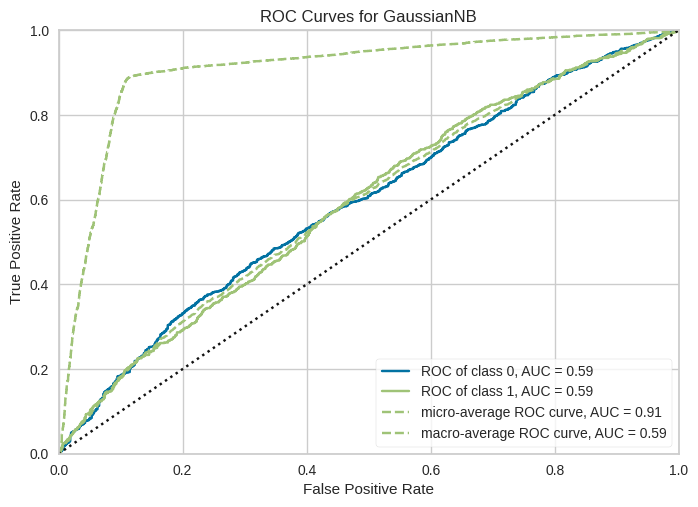

In [57]:
plot_model(tuned_modelo,plot='auc')

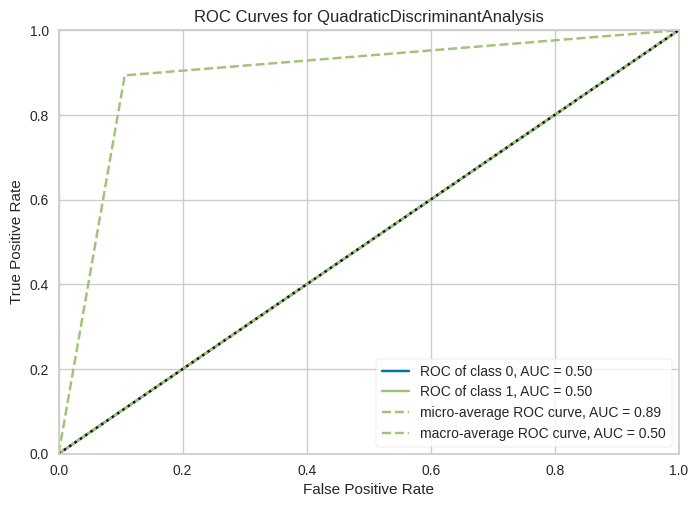

In [65]:
plot_model(tuned_modelo,plot='auc')

In [58]:

# feature importance
plot_model(tuned_modelo,plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

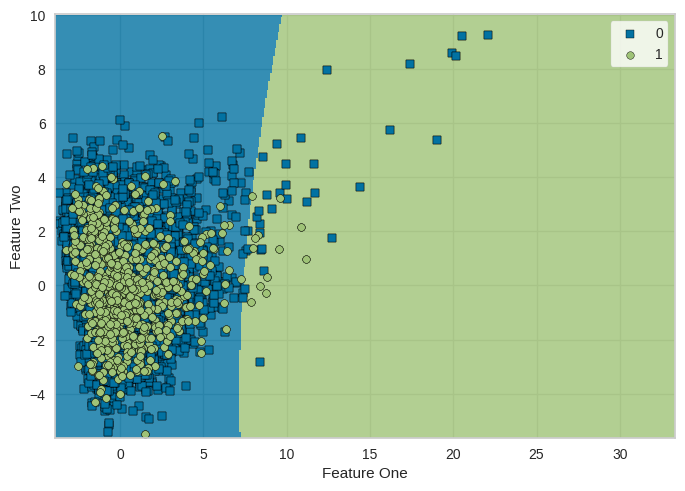

In [59]:

## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

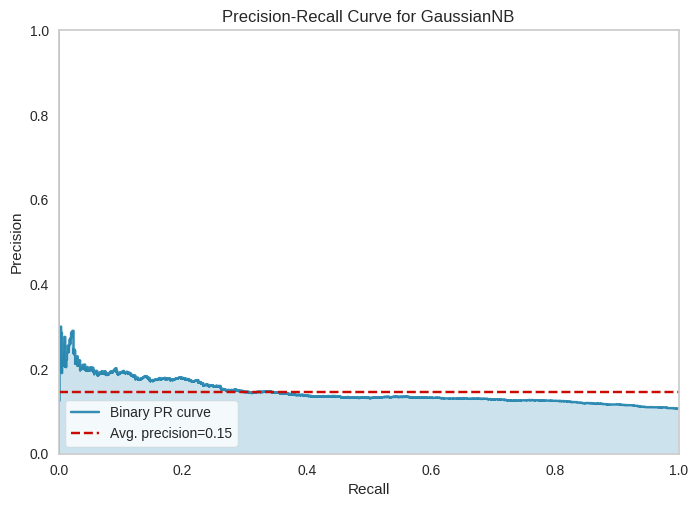

In [60]:

# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')

In [ ]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

predicciones.head()

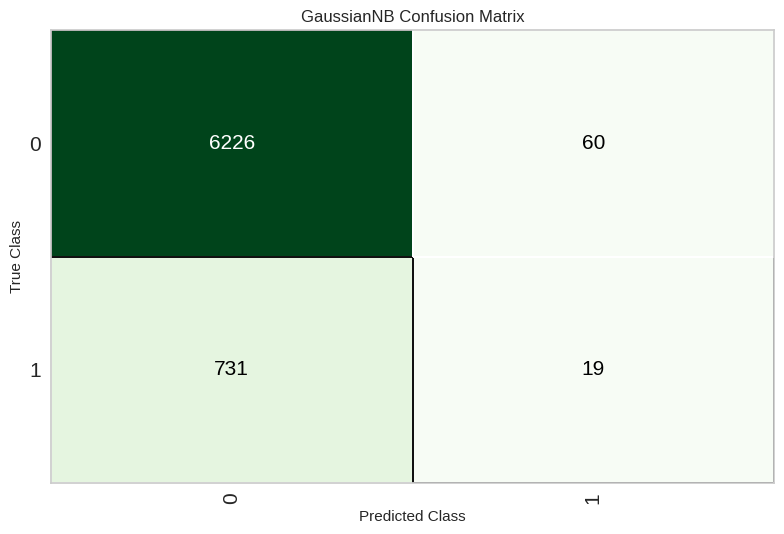

In [61]:
plot_model(tuned_modelo,'confusion_matrix')

In [ ]:


# modelo final entrenado con todo el conjunto de datos

final_modelo=finalize_model(tuned_modelo)

In [ ]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'ModeloPrepagoVehiculo'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")
